In [1]:
import pandas as pd
data= pd.read_csv('data1.csv',encoding='gbk')
data = pd.DataFrame(data)
data.head()

,CityId,Han,age,card_age,cashAmt_mean,cashAmt_non_null_months,cashCnt_mean,cashCnt_non_null_months,cashTotalAmt,cashTotalCnt,...,publicPayCnt,sex,threeVerify,transAmt_mean?,transAmt_non_null_months,transCnt_mean,transCnt_non_null_months,transTotalAmt?,transTotalCnt,Default
0,一线城市,0,38,2,0.0,0,0.0,0,0,0,...,0,?女,?不一致,0.00,2,0.00,2,0,0,0
1,一线城市,0,39,19,0.0,0,0.0,0,0,0,...,0,?男,?一致,180.00,5,1.00,5,900,5,0
2,二线城市,0,40,16,0.0,0,0.0,0,0,0,...,2,?女,?一致,2378.89,9,0.33,9,21410,3,0
3,其它,0,38,13,22000.0,1,6.0,1,22000,6,...,0,?男,?一致,28008.00,10,1.50,10,280120,15,0
4,二线城市,0,24,8,0.0,0,0.0,0,0,0,...,8,?男,?一致,842.00,5,1.80,5,4220,9,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 33 columns):
CityId                      327 non-null object
Han                         327 non-null int64
age                         327 non-null int64
card_age                    327 non-null int64
cashAmt_mean                327 non-null float64
cashAmt_non_null_months     327 non-null int64
cashCnt_mean                327 non-null float64
cashCnt_non_null_months     327 non-null int64
cashTotalAmt                327 non-null int64
cashTotalCnt                327 non-null int64
education                   327 non-null object
idVerify                    327 non-null object
inCourt                     327 non-null int64
isBlackList                 327 non-null int64
isCrime                     327 non-null int64
isDue                       327 non-null int64
maritalStatus               327 non-null object
monthCardLargeAmt           327 non-null int64
netLength                   327 non-null 

In [3]:
import pandas as pd
data_des = data.describe(include='all')
print(data_des)

       CityId         Han         age    card_age  cashAmt_mean  \
count     327  327.000000  327.000000  327.000000    327.000000   
unique      4         NaN         NaN         NaN           NaN   
top      二线城市         NaN         NaN         NaN           NaN   
freq      145         NaN         NaN         NaN           NaN   
mean      NaN    0.048930   34.495413   26.957187   1609.714862   
std       NaN    0.216052    8.301035   21.021855   3005.165899   
min       NaN    0.000000   21.000000    0.000000      0.000000   
25%       NaN    0.000000   28.000000   10.000000      0.000000   
50%       NaN    0.000000   33.000000   23.000000    300.000000   
75%       NaN    0.000000   40.000000   38.000000   1800.000000   
max       NaN    1.000000   58.000000   85.000000  22000.000000   

        cashAmt_non_null_months  cashCnt_mean  cashCnt_non_null_months  \
count                327.000000    327.000000               327.000000   
unique                      NaN           NaN  

In [4]:
#4.5 是否违约（Default）特征分析
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
# 绘制柱状图，查看违约关系的取值分布情况
data['Default'].value_counts(dropna=False).plot(kind='bar',rot=40)

# 在柱形上方显示计数
counts = data['Default'].value_counts(dropna=False).values
for index, item in zip([0,1,2], counts): 
    plt.text(index, item, item, ha="center", va= "bottom", fontsize=12) 

# 设置柱形名称
plt.xticks([0,1,2],['未违约','违约','NaN'])

# 设置x、y轴标签
plt.xlabel('是否违约')
plt.ylabel('客户数量')

# 设置标题以及字体大小
plt.title('违约与未违约数量分布图',size=13)

# 设置中文显示
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['font.family']=['sans-serif']
plt.show()

<Figure size 800x600 with 1 Axes>

IndexError: index 4 is out of bounds for axis 0 with size 3

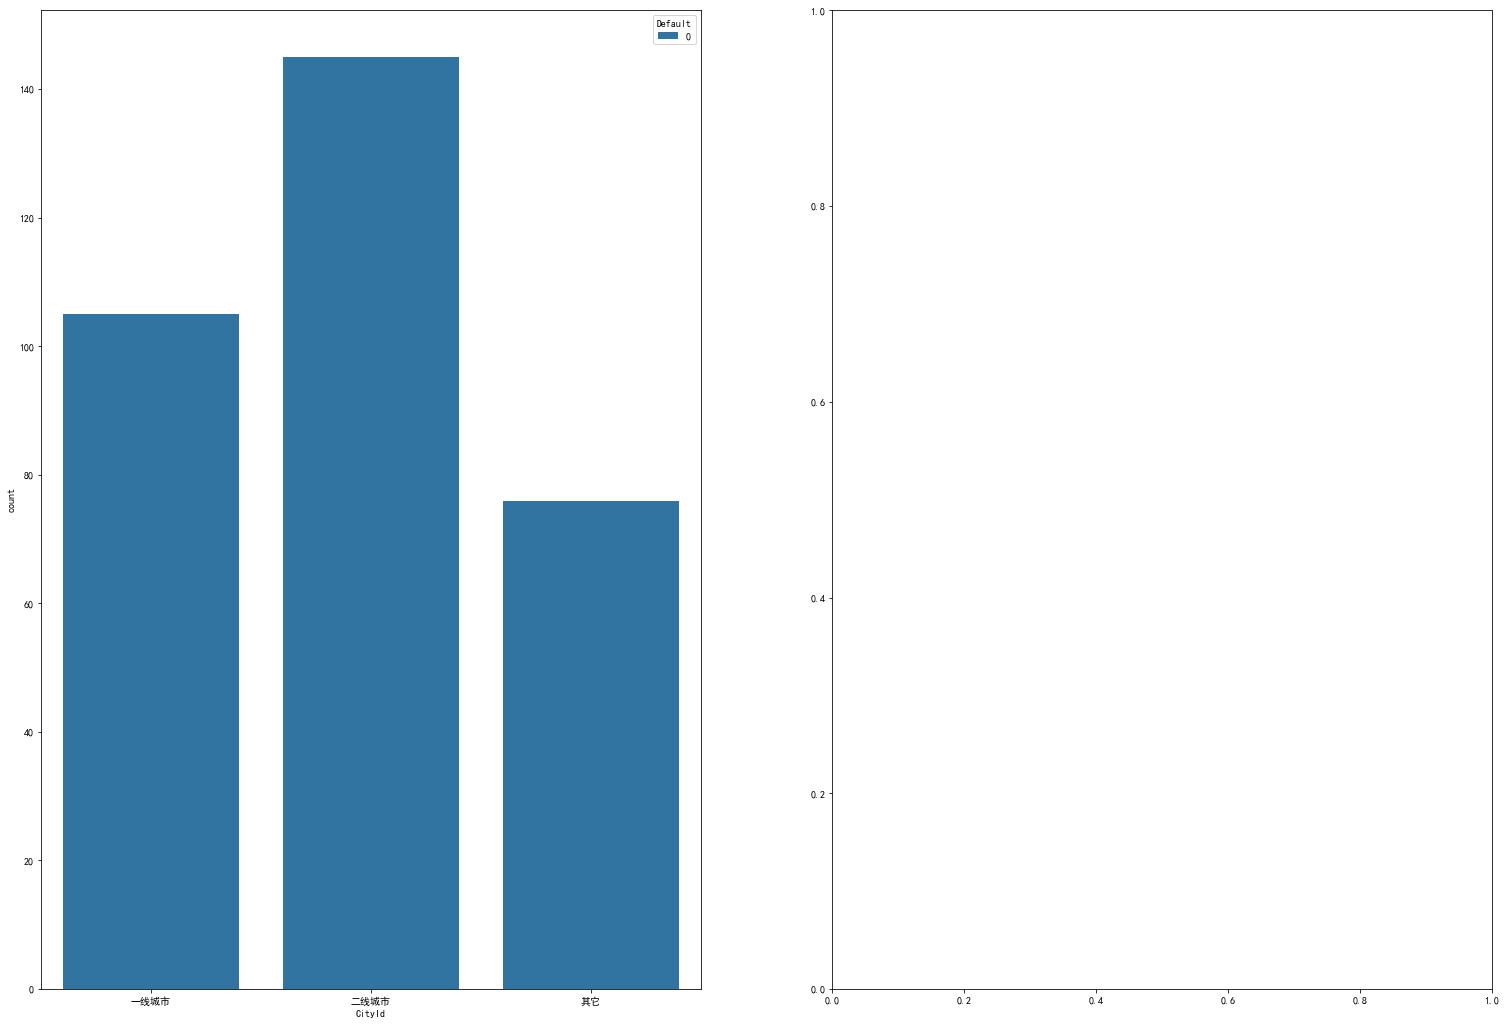

In [5]:
#4.6 城市级别（CityId）特征分布
import seaborn as sns
import matplotlib.pyplot as plt

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(26,18))

# 对CityId列的类别设定顺序
data['CityId'] = data['CityId'].astype('category')
data['CityId'] = data['CityId'].cat.set_categories(['一线城市', '二线城市', '其它'],ordered=True)

# 绘制柱状图，查看不同城市级别在不同是否违约的取值分布情况
sns.countplot(x='CityId',hue='Default',data=data,ax=ax1)

# 将具体的计数值显示在柱形上方
counts=data['Default'].groupby(data['CityId']).value_counts().values
count1 = counts[[0, 2, 4]]
count2 = counts[[1, 3, 5]]
for index, item1, item2 in zip([0,1,2], count1, count2): 
    ax1.text(index-0.2, item1 + 0.05, '%.0f' % item1, ha="center", va= "bottom",fontsize=12)
    ax1.text(index+0.2, item2 + 0.05, '%.0f' % item2, ha="center", va= "bottom",fontsize=12)
    

# 绘制柱状图查看违约率分布
cityid_rate = data.groupby('CityId')['Default'].sum() / data.groupby('CityId')['Default'].count()
sns.barplot(x=[0,1,2],y=cityid_rate.values,ax=ax2)

# 将具体的计数值显示在柱形上方
for index, item in zip([0,1,2], cityid_rate): 
     ax2.text(index, item, '%.3f' % item, ha="center", va= "bottom",fontsize=12)
        
#设置柱形名称
ax1.set_xticklabels(['一线城市','二线城市','其它'])
ax2.set_xticklabels(['一线城市','二线城市','其它'])

# 设置图例名称
ax1.legend(labels=['未违约','违约'])

# 设置标题以及字体大小
ax1.set_title('不同城市级别下不同违约情况数量分布柱状图',size=13)
ax1.set_title('不同城市级别违约率分布柱状图',size=13)

# 设置x,y轴标签
ax1.set_xlabel('CityId')
ax1.set_ylabel('客户人数')
ax2.set_xlabel('CityId')
ax2.set_ylabel('违约率')

#显示汉语标注
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['font.family']=['sans-serif']
plt.show()

ValueError: operands could not be broadcast together with shape (4,) (2,)

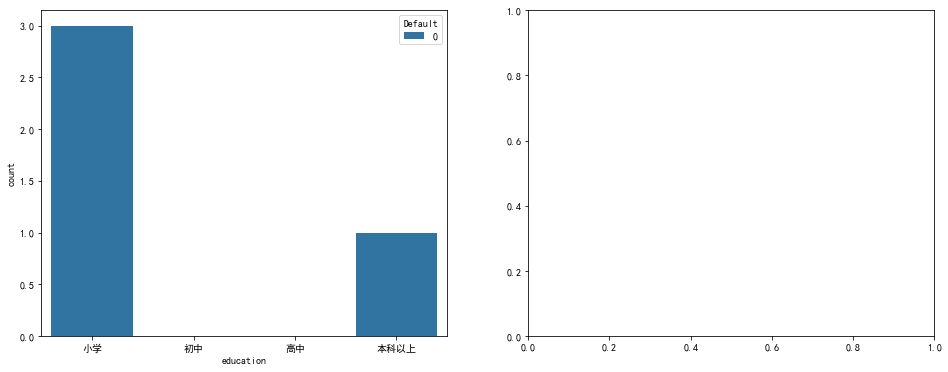

In [43]:
#4.7 文化程度（education）特征分布
import seaborn as sns
import matplotlib.pyplot as plt

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(16,6))

# 对education列的类别设定顺序
data['education'] = data['education'].astype('category')
data['education'] = data['education'].cat.set_categories(['小学', '初中', '高中', '本科以上'],ordered=True)

# 绘制柱状图，查看不同文化程度(education)在不同是否违约(Default)的取值分布情况
sns.countplot(x='education',hue='Default',data=data,ax=ax1)

# 将具体的计数值显示在柱形上方
counts=data['Default'].groupby(data['education']).value_counts().values
count1 = counts[[0, 2, 4,6]]
count2 = counts[[1, 3, 5,7]]
for index, item1, item2 in zip([0,1,2,3], count1, count2): 
    ax1.text(index-0.2, item1 + 0.05, '%.0f' % item1, ha="center", va= "bottom",fontsize=12)
    ax1.text(index+0.2, item2 + 0.05, '%.0f' % item2, ha="center", va= "bottom",fontsize=12)


# 绘制柱状图查看违约率分布
education_rate = data.groupby('education')['Default'].sum() / data.groupby('education')['Default'].count()
sns.barplot(x=[0,1,2,3],y=education_rate.values,ax=ax2)

# 将具体的计数值显示在柱形上方
for index, item in zip([0,1,2,3], education_rate): 
     ax2.text(index, item, '%.2f' % item, ha="center", va= "bottom",fontsize=12)
        
# 设置柱形名称
ax1.set_xticklabels(['小学','初中','高中','本科以上'])
ax2.set_xticklabels(['小学','初中','高中','本科以上'])

# 设置图例名称
ax1.legend(labels=['未违约','违约'])

# 设置标题以及字体大小
ax1.set_title('不同文化程度下不同违约情况数量分布柱状图',size=13)
ax2.set_title('不同文化程度下违约率分布柱状图',size=13)

# 设置x,y轴标签
ax1.set_xlabel('education')
ax1.set_ylabel('客户人数')
ax2.set_xlabel('education')
ax2.set_ylabel('违约率')

#显示汉语标注
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['font.family']=['sans-serif']
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

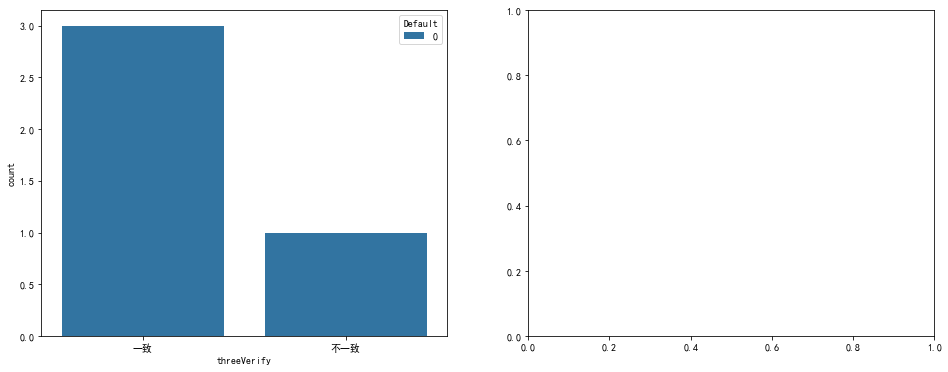

In [44]:
#4.8 三要素（threeVerify）特征分布
import seaborn as sns
import matplotlib.pyplot as plt

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(16,6))

# 对threeVerify列的类别设定顺序
data['threeVerify'] = data['threeVerify'].astype('category')
data['threeVerify'] = data['threeVerify'].cat.set_categories(['一致','不一致'],ordered=True)

# 绘制柱状图，查看不同三要素验证情况(threeVerify)在不同是否违约(Default)的取值分布情况
sns.countplot(x='threeVerify',hue='Default',data=data,ax=ax1)

# 将具体的计数值显示在柱形上方
counts=data['Default'].groupby(data['threeVerify']).value_counts().values
count1 = counts[[0, 2]]
count2 = counts[[1, 3]]
for index, item1, item2 in zip([0,1,2,3], count1, count2): 
    ax1.text(index-0.2, item1 + 0.05, '%.0f' % item1, ha="center", va= "bottom",fontsize=12)
    ax1.text(index+0.2, item2 + 0.05, '%.0f' % item2, ha="center", va= "bottom",fontsize=12)


# 绘制柱状图查看违约率分布
threeVerify_rate = data.groupby('threeVerify')['Default'].sum() / data.groupby('threeVerify')['Default'].count()
sns.barplot(x=[0,1],y=threeVerify_rate.values,ax=ax2)

# 将具体的计数值显示在柱形上方
for index, item in zip([0,1], threeVerify_rate): 
     ax2.text(index, item, '%.2f' % item, ha="center", va= "bottom",fontsize=12)
        
# 设置柱形名称
ax1.set_xticklabels(['一致','不一致'])
ax2.set_xticklabels(['一致','不一致'])

# 设置图例名称
ax1.legend(labels=['未违约','违约'])

# 设置标题以及字体大小
ax1.set_title('不同三要素验证下不同违约情况数量分布柱状图',size=13)
ax2.set_title('不同三要素验证下违约率分布柱状图',size=13)

# 设置x,y轴标签
ax1.set_xlabel('threeVerify')
ax1.set_ylabel('客户人数')
ax2.set_xlabel('threeVerify')
ax2.set_ylabel('违约率')

#显示汉语标注
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['font.family']=['sans-serif']
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

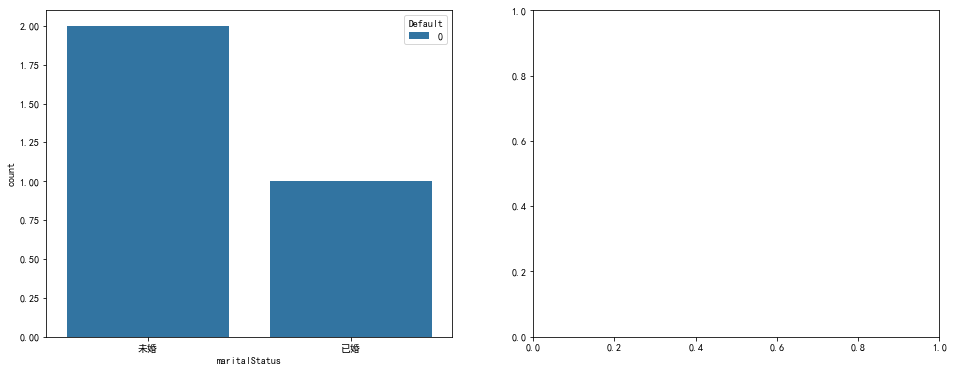

In [45]:
#4.9 婚姻状况（maritalStatus）特征分布
import seaborn as sns
import matplotlib.pyplot as plt

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(16,6))

# 对maritalStatus列的类别设定顺序
data['maritalStatus'] = data['maritalStatus'].astype('category')
data['maritalStatus'] = data['maritalStatus'].cat.set_categories(['未婚','已婚'],ordered=True)

# 绘制柱状图，查看不同婚姻状况在不同违约情况的取值分布
sns.countplot(x='maritalStatus',hue='Default',data=data,ax=ax1)

# 将具体的计数值显示在柱形上方
counts=data['Default'].groupby(data['maritalStatus']).value_counts().values
count1 = counts[[0, 2]]
count2 = counts[[1, 3]]
for index, item1, item2 in zip([0,1,2,3], count1, count2): 
    ax1.text(index-0.2, item1 + 0.05, '%.0f' % item1, ha="center", va= "bottom",fontsize=12)
    ax1.text(index+0.2, item2 + 0.05, '%.0f' % item2, ha="center", va= "bottom",fontsize=12)


# 绘制柱状图查看违约率分布
maritalStatus_rate = data.groupby('maritalStatus')['Default'].sum() / data.groupby('maritalStatus')['Default'].count()
sns.barplot(x=[0,1],y=maritalStatus_rate.values,ax=ax2)

# 将具体的计数值显示在柱形上方
for index, item in zip([0,1], maritalStatus_rate): 
     ax2.text(index, item, '%.2f' % item, ha="center", va= "bottom",fontsize=12)
        
# 设置柱形名称
ax1.set_xticklabels(['未婚','已婚'])
ax2.set_xticklabels(['未婚','已婚'])

# 设置图例名称
ax1.legend(labels=['未违约','违约'])

# 设置标题以及字体大小
ax1.set_title('不同婚姻状况下不同违约情况数量分布柱状图',size=13)
ax2.set_title('不同婚姻状况下违约率分布柱状图',size=13)

# 设置x,y轴标签
ax1.set_xlabel('maritalStatus')
ax1.set_ylabel('客户人数')
ax2.set_xlabel('maritalStatus')
ax2.set_ylabel('违约率')

#显示汉语标注
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['font.family']=['sans-serif']
plt.show()

ValueError: operands could not be broadcast together with shape (5,) (4,)

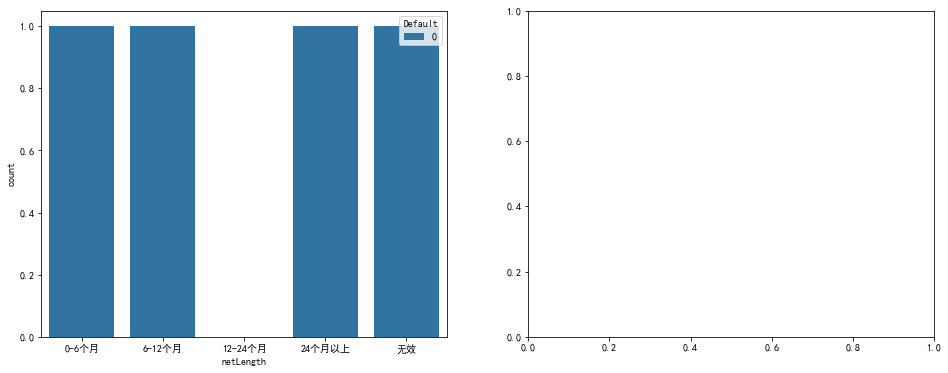

In [46]:
#4.10 在网时长（netLength）特征分布
import seaborn as sns
import matplotlib.pyplot as plt

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(16,6))

# 对netLength列的类别设定顺序
data['netLength'] = data['netLength'].astype('category')
data['netLength'] = data['netLength'].cat.set_categories(['0-6个月','6-12个月','12-24个月','24个月以上','无效'],ordered=True)

# 绘制柱状图，查看不同在网时长在不同违约情况的取值分布
sns.countplot(x='netLength',hue='Default',data=data,ax=ax1)

# 将具体的计数值显示在柱形上方
counts=data['Default'].groupby(data['netLength']).value_counts().values
count1 = counts[[0,2,4,6,8]]
count2 = counts[[1,3,5,7,9]]

# 将具体的计数值显示在柱形上方
for index, item1, item2 in zip([0,1,2,3,4], count1, count2): 
    ax1.text(index-0.2, item1 + 0.05, '%.0f' % item1, ha="center", va= "bottom",fontsize=12)
    ax1.text(index+0.2, item2 + 0.05, '%.0f' % item2, ha="center", va= "bottom",fontsize=12)


# 绘制柱状图查看违约率分布
netLength_rate = data.groupby('netLength')['Default'].sum() / data.groupby('netLength')['Default'].count()
sns.barplot(x=[0,1,2,3,4],y=netLength_rate.values,ax=ax2)

# 将具体的计数值显示在柱形上方
for index, item in zip([0,1,2,3,4], netLength_rate): 
     ax2.text(index, item, '%.2f' % item, ha="center", va= "bottom",fontsize=12)
        
# 设置柱形名称
ax1.set_xticklabels(['0-6个月','6-12个月','12-24个月','24个月以上','无效'])
ax2.set_xticklabels(['0-6个月','6-12个月','12-24个月','24个月以上','无效'])

# 设置图例名称
ax1.legend(labels=['未违约','违约'])

# 设置标题以及字体大小
ax1.set_title('不同在网时长下不同违约情况数量分布柱状图',size=13)
ax2.set_title('不同在网时长下违约率分布柱状图',size=13)

# 设置x,y轴标签
ax1.set_xlabel('netLength')
ax1.set_ylabel('客户人数')
ax2.set_xlabel('netLength')
ax2.set_ylabel('违约率')

#显示汉语标注
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['font.family']=['sans-serif']
plt.show()

D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


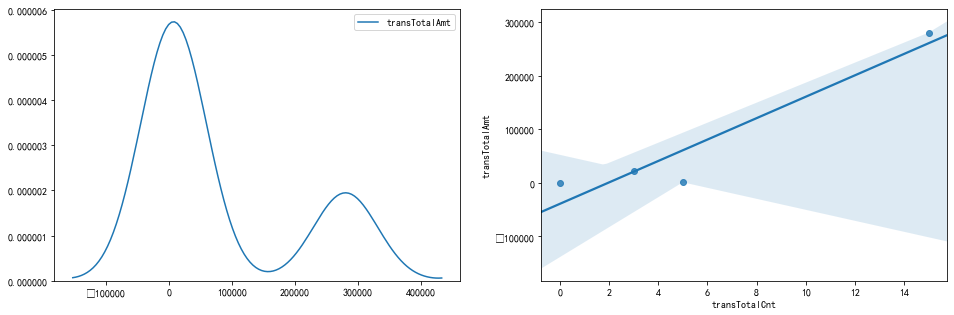

In [47]:
#4.11 总消费金额（transTotalAmt）的分布
import seaborn as sns
import matplotlib.pyplot as plt

# 建立画布ax1和ax2,及设置图像大小，设置subplots()函数中参数为(1,2)表示两画图呈一行两列
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 5))

# 在画布ax1中画出总消费金额的核密度图
sns.kdeplot(data['transTotalAmt'],shade=False,ax=ax1)

# 在画布ax2中画出总消费笔数和总消费金额的回归关系图
sns.regplot(x='transTotalCnt',y='transTotalAmt',data=data,ax=ax2)

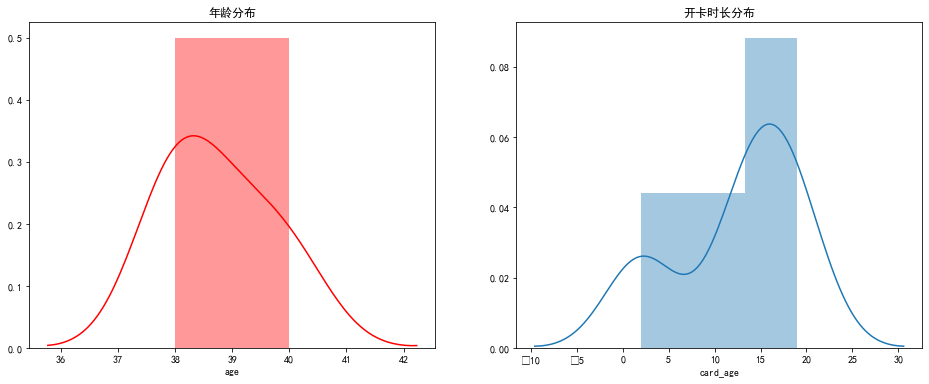

In [48]:
#4.12 年龄和开卡时长分布
import seaborn as sns
import matplotlib.pyplot as plt

# 建立画布ax1和ax2,及设置图像大小，设置subplots()函数中参数为(1,2)表示一行两列
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(16,6))

# 在画布ax1中绘制年龄的直方图，颜色为红色
sns.distplot(data['age'],color='r',ax=ax1)

# 在画布ax2中绘制开卡时长的直方图，颜色为默认值
sns.distplot(data['card_age'],ax=ax2)

# 在画布ax1、ax2中设置标题
ax1.set_title('年龄分布')
ax2.set_title('开卡时长分布')
# 显示汉语标注
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['font.family']=['sans-serif']

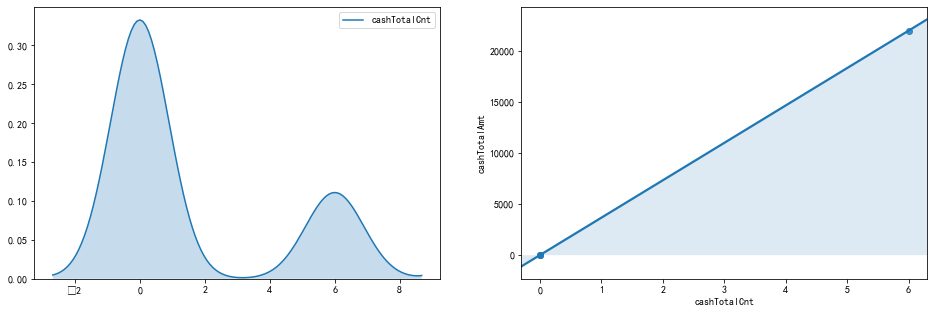

In [49]:
#4.13 总取现金额（cashTotalAmt）的分布
import seaborn as sns
import matplotlib.pyplot as plt

# 建立画布ax1和ax2,及设置图像大小，设置subplots()函数中参数为(1,2)表示两画图呈一行两列
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 5))

# 在画布ax1中画出总取现金额的核密度图
sns.kdeplot(data['cashTotalCnt'],shade=True,ax=ax1)

# 在画布ax2中画出总取现笔数和总取现金额的回归关系图
sns.regplot(x='cashTotalCnt',y='cashTotalAmt',data=data,ax=ax2)

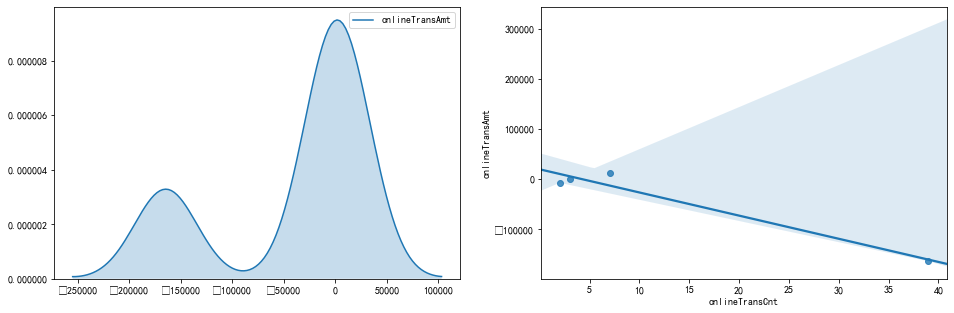

In [50]:
#4.14 网上消费金额（onlineTransAmt）的分布
import seaborn as sns
import matplotlib.pyplot as plt

# 建立画布ax1和ax2,及设置图像大小，设置subplots()函数中参数为(1,2)表示两画图呈一行两列
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 5))

# 在画布ax1中画出网上消费金额的核密度估计曲线
sns.kdeplot(data['onlineTransAmt'],shade=True,ax=ax1)

# 在画布ax2中画出网上消费笔数和网上消费金额的回归关系图
sns.regplot(x='onlineTransCnt',y='onlineTransAmt',data=data,ax=ax2)

In [51]:
#4.15 查看存在缺失值的特征
# 计算特征缺失值个数
na_counts = data.isnull().sum()

# 将na_counts取大于0的部分进行降序排序
missing_value = na_counts[na_counts > 0].sort_values(axis=0,ascending=False)

# 查看存在缺失值的特征
print(missing_value)

idVerify         2
maritalStatus    1
dtype: int64


In [52]:
#4.16 离散型特征的缺失值处理
import pandas as pd

# 缺失值处理
data.dropna(subset=['Default'],inplace=True)
filling_columns=['sex','maritalStatus','threeVerify','idVerify','education']
for column in filling_columns:
    data[column].fillna('未知',inplace=True)

# 查看存在缺失值的特征
na_counts = data.isnull().sum()
missing_value = na_counts[na_counts > 0].sort_values(ascending = False)
print(missing_value)

ValueError: fill value must be in categories

In [53]:
#4.17 离散型特征的异常值处理
import pandas as pd

# 异常值处理
data['isCrime'] = data['isCrime'].replace(2,0)

# 查看处理后的数据情况
print(data['isCrime'].value_counts())

0    4
Name: isCrime, dtype: int64


In [54]:
#4.18 查看连续性特征的取值
# 所有连续型特征列名已保存在continuous_columns中
continuous_columns = ['age','cashTotalAmt','cashTotalCnt','monthCardLargeAmt','onlineTransAmt','onlineTransCnt','publicPayAmt','publicPayCnt','transTotalAmt','transTotalCnt','transCnt_non_null_months','transAmt_mean','transAmt_non_null_months','cashCnt_mean','cashCnt_non_null_months','cashAmt_mean','cashAmt_non_null_months','card_age']
# 查看数据各连续型特征的最小值
data_con_min =data[continuous_columns].min()
print(data_con_min)

age                             38.0
cashTotalAmt                     0.0
cashTotalCnt                     0.0
monthCardLargeAmt                0.0
onlineTransAmt             -164560.0
onlineTransCnt                   2.0
publicPayAmt                     0.0
publicPayCnt                     0.0
transTotalAmt                    0.0
transTotalCnt                    0.0
transCnt_non_null_months         2.0
transAmt_mean                    0.0
transAmt_non_null_months         2.0
cashCnt_mean                     0.0
cashCnt_non_null_months          0.0
cashAmt_mean                     0.0
cashAmt_non_null_months          0.0
card_age                         2.0
dtype: float64


In [55]:
#4.19 网上消费金额（onlineTransAmt）异常值检测
# 从原始数据中筛选出网上消费金额小于0时，网上消费金额和网上消费笔数这两列
online_trans =data[data['onlineTransAmt']<0][['onlineTransAmt','onlineTransCnt']]
print(online_trans)

   onlineTransAmt  onlineTransCnt
0           -7710               2
2         -164560              39


In [56]:
#4.20 网上消费金额（onlineTransAmt）异常值处理
# 将网上消费笔数为0时的网上消费金额皆修改为0
data.loc[data['onlineTransCnt']==0,'onlineTransAmt']=0
# 查看修正后网上消费笔数为0时，网上消费金额与网上消费笔数
online_after = data[data["onlineTransCnt"]  == 0 ][["onlineTransAmt","onlineTransCnt"]] 
print(online_after)

Empty DataFrame
Columns: [onlineTransAmt, onlineTransCnt]
Index: []


Text(0.5, 1.0, 'onlineTransAmt distribution')

D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


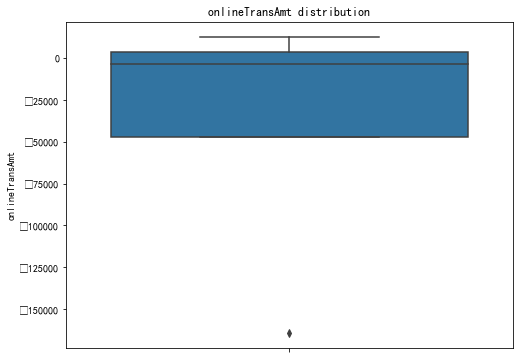

In [57]:
#4.21 网上消费金额（onlineTransAmt）盒图绘制
import seaborn as sns
import matplotlib.pyplot as plt 
fig,ax = plt.subplots(figsize=(8,6))
# 绘制盒图查看网上消费金额数据分布
sns.boxplot(x=data['onlineTransAmt'],orient='v')
plt.title('onlineTransAmt distribution')

In [58]:
#4.22 网上消费金额（onlineTransAmt）异常值处理
# 筛选出网上消费金额在2千万以下的数据样本,更新data
data = data[data['onlineTransAmt']<2.0e+07]
print(data.head())

  CityId  Default  Han  age  card_age  cashAmt_mean  cashAmt_non_null_months  \
0   一线城市        0    0   38         2             0                        0   
1   一线城市        0    0   39        19             0                        0   
2   二线城市        0    0   40        16             0                        0   
3     其它        0    0   38        13         22000                        1   

   cashCnt_mean  cashCnt_non_null_months  cashTotalAmt  ...  publicPayAmt  \
0             0                        0             0  ...             0   
1             0                        0             0  ...             0   
2             0                        0             0  ...           770   
3             6                        1         22000  ...             0   

  publicPayCnt sex  threeVerify  transAmt_mean  transAmt_non_null_months  \
0            0   女          不一致       0.000000                         2   
1            0   男           一致     180.000000               

In [59]:
#4.23 公共事业缴费金额（publicPayAmt）异常值检测
# 从原始数据中筛选出公共事业缴费金额小于0时，公共事业缴费笔数和公共事业缴费金额这两列
public_pay = data[data['publicPayAmt']<0][['publicPayCnt','publicPayAmt']]
print(public_pay)

Empty DataFrame
Columns: [publicPayCnt, publicPayAmt]
Index: []


In [60]:
#4.24 公共事业缴费金额（publicPayAmt）异常值处理
# 将公共事业缴费笔数为0时的公共事业缴费金额皆修改为0（直接在原始数据上进行修改）
data.loc[data['publicPayCnt']==0,'publicPayAmt']=0

# 查看修正后的，公共事业缴费笔数为0时的公共事业缴费金额与公共事业缴费笔数
public_after = data[data["publicPayCnt"]  ==  0][["publicPayAmt","publicPayCnt"]]
print(public_after)

   publicPayAmt  publicPayCnt
0             0             0
1             0             0
3             0             0


Text(0.5, 1.0, 'publicPayAmt distribution')

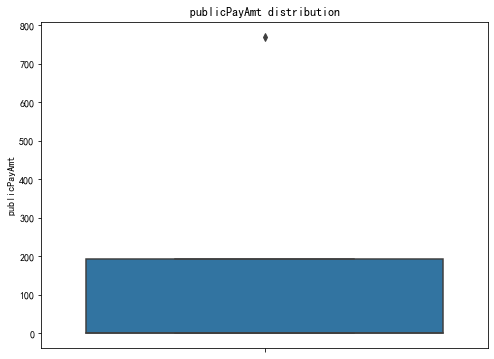

In [61]:
#4.25 公共事业缴费金额（publicPayAmt）盒图绘制
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(8,6))
# 绘制盒图查看公共事业缴费金额数据分布。
sns.boxplot(data['publicPayAmt'],orient='v')
plt.title('publicPayAmt distribution')

In [62]:
#4.26 公共事业缴费金额（publicPayAmt）异常值处理
# 筛选出公共事业缴费金额小于-400万的样本数据
public_pay = data[data['publicPayAmt']<-4.0e+06]
print(public_pay[['publicPayCnt','publicPayAmt']])

Empty DataFrame
Columns: [publicPayCnt, publicPayAmt]
Index: []


In [63]:
#4.27 总消费金额（transTotalAmt）异常值检测
# 从原始数据中筛选出总消费笔数等于0时，总消费笔数，总消费金额这两列
transTotal = data[data['transTotalCnt']==0][['transTotalCnt','transTotalAmt']]
print(transTotal)

   transTotalCnt  transTotalAmt
0              0              0


Text(0.5, 1.0, 'transTotalAmt distribution')

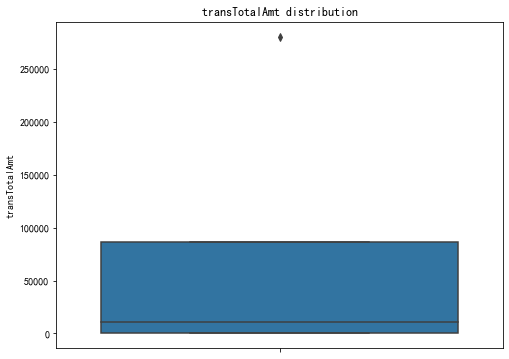

In [64]:
#4.28 总消费金额（transTotalAmt）盒图绘制
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(8,6))
# 绘制盒图，查看总消费金额数据分布。
sns.boxplot(data['transTotalAmt'],orient='v')
plt.title('transTotalAmt distribution')

In [65]:
#4.29 总消费金额（transTotalAmt）异常值处理
# 筛选出总消费金额大于1000万的样本数据
transTotal = data[data['transTotalAmt']>1.0e+07]
print(transTotal[['transTotalAmt','transTotalCnt','onlineTransAmt','onlineTransCnt','monthCardLargeAmt']])

Empty DataFrame
Columns: [transTotalAmt, transTotalCnt, onlineTransAmt, onlineTransCnt, monthCardLargeAmt]
Index: []


In [66]:
#4.30 总取现金额（cashTotalAmt）异常值检测
# 筛选出总取现笔数为0时，总取现笔数，总取现金额这两列
cashTotal = data[data['cashTotalCnt']==0][['cashTotalCnt','cashTotalAmt']]
print(cashTotal)

   cashTotalCnt  cashTotalAmt
0             0             0
1             0             0
2             0             0


Text(0.5, 1.0, 'cashTotalAmt distribution')

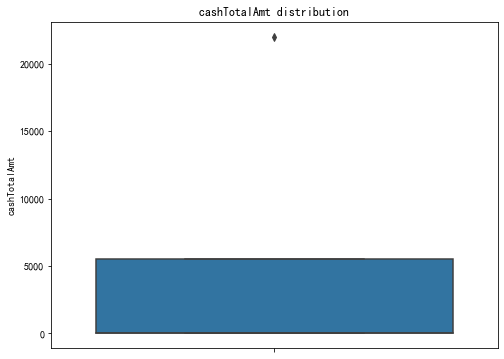

In [67]:
#4.31 总取现金额（cashTotalAmt）盒图绘制
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(8,6))
# 绘制盒图，查看总取现金额数据分布。
sns.boxplot(data['cashTotalAmt'],orient='v')
plt.title('cashTotalAmt distribution')

In [68]:
#4.32 总取现金额（cashTotalAmt）异常值处理
# 筛选出总取现金额大于50万的样本数据。
cashTotal=data[data['cashTotalAmt']>5.0e+05]
print(cashTotal)

Empty DataFrame
Columns: [CityId, Default, Han, age, card_age, cashAmt_mean, cashAmt_non_null_months, cashCnt_mean, cashCnt_non_null_months, cashTotalAmt, cashTotalCnt, education, idVerify, inCourt, isBlackList, isCrime, isDue, maritalStatus, monthCardLargeAmt, netLength, noTransWeekPre, onlineTransAmt, onlineTransCnt, publicPayAmt, publicPayCnt, sex, threeVerify, transAmt_mean, transAmt_non_null_months, transCnt_mean, transCnt_non_null_months, transTotalAmt, transTotalCnt]
Index: []

[0 rows x 33 columns]


Text(0.5, 1.0, 'monthCardLargeAmt distribution')

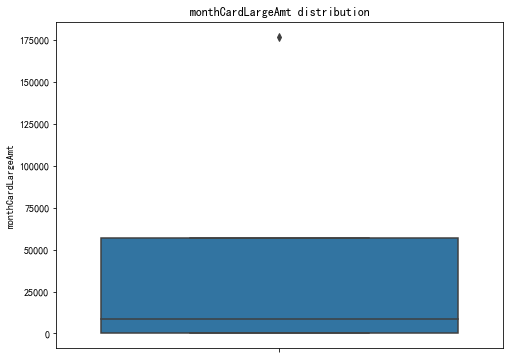

In [69]:
#4.33 月最大消费金额（monthCardLargeAmt）盒图绘制
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(8,6))
# 绘制盒图，查看月最大消费金额数据分布
sns.boxplot(data['monthCardLargeAmt'],orient='v')
plt.title('monthCardLargeAmt distribution')

In [70]:
#4.34 月最大消费金额（monthCardLargeAmt）异常值处理
# 筛选出月最大消费金额大于200万的数据
monthCard = data[data['monthCardLargeAmt']>2.0e+06]
print(monthCard)

Empty DataFrame
Columns: [CityId, Default, Han, age, card_age, cashAmt_mean, cashAmt_non_null_months, cashCnt_mean, cashCnt_non_null_months, cashTotalAmt, cashTotalCnt, education, idVerify, inCourt, isBlackList, isCrime, isDue, maritalStatus, monthCardLargeAmt, netLength, noTransWeekPre, onlineTransAmt, onlineTransCnt, publicPayAmt, publicPayCnt, sex, threeVerify, transAmt_mean, transAmt_non_null_months, transCnt_mean, transCnt_non_null_months, transTotalAmt, transTotalCnt]
Index: []

[0 rows x 33 columns]


Text(0.5, 1.0, 'transTotalCnt distribution')

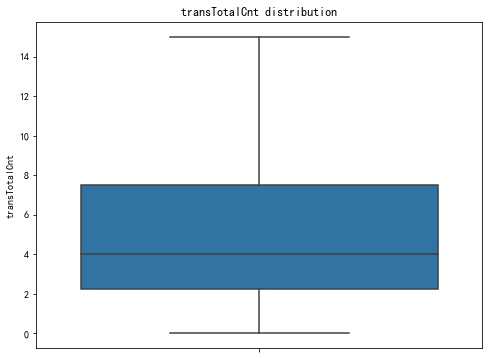

In [71]:
#4.35 总消费笔数（transTotalCnt）盒图绘制
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(8,6))
# 绘制盒图，查看总消费笔数数据分布
sns.boxplot(data['transTotalCnt'],orient='v')
plt.title('transTotalCnt distribution')

In [72]:
#4.36 总消费笔数（transTotalCnt）异常值处理
# 从data中筛选总消费笔数小于6000的值，赋值给data
data = data[data['transTotalCnt']<6000]
print(data.head())

  CityId  Default  Han  age  card_age  cashAmt_mean  cashAmt_non_null_months  \
0   一线城市        0    0   38         2             0                        0   
1   一线城市        0    0   39        19             0                        0   
2   二线城市        0    0   40        16             0                        0   
3     其它        0    0   38        13         22000                        1   

   cashCnt_mean  cashCnt_non_null_months  cashTotalAmt  ...  publicPayAmt  \
0             0                        0             0  ...             0   
1             0                        0             0  ...             0   
2             0                        0             0  ...           770   
3             6                        1         22000  ...             0   

  publicPayCnt sex  threeVerify  transAmt_mean  transAmt_non_null_months  \
0            0   女          不一致       0.000000                         2   
1            0   男           一致     180.000000               

In [73]:
#4.37 数字编码
import numpy as np
import pandas as pd

data["maritalStatus"] = data["maritalStatus"].map({"未知":0,"未婚":1,"已婚":2})
data['education']= data["education"].map({"未知":0,"小学":1,"初中":2,"高中":3,"本科以上":4})
data['idVerify']= data["idVerify"].map({"未知":0,"一致":1,"不一致":2})
data['threeVerify']= data["threeVerify"].map({"未知":0,"一致":1,"不一致":2})
data["netLength"] = data["netLength"].map({"无效":0,"0-6个月":1,"6-12个月":2,"12-24个月":3,"24个月以上":4})
data["sex"] = data["sex"].map({"未知":0,"男":1,"女":2})
data["CityId"] = data["CityId"].map({"一线城市":1,"二线城市":2,"其它":3})

print(data.head())

  CityId  Default  Han  age  card_age  cashAmt_mean  cashAmt_non_null_months  \
0      1        0    0   38         2             0                        0   
1      1        0    0   39        19             0                        0   
2      2        0    0   40        16             0                        0   
3      3        0    0   38        13         22000                        1   

   cashCnt_mean  cashCnt_non_null_months  cashTotalAmt  ...  publicPayAmt  \
0             0                        0             0  ...             0   
1             0                        0             0  ...             0   
2             0                        0             0  ...           770   
3             6                        1         22000  ...             0   

  publicPayCnt  sex  threeVerify  transAmt_mean  transAmt_non_null_months  \
0            0    2            2       0.000000                         2   
1            0    1            1     180.000000            

In [74]:
#4.38 One-Hot编码
import numpy as np
import pandas as pd

data = pd.get_dummies(data=data,columns=['maritalStatus','education','idVerify','threeVerify','Han','netLength','sex','CityId'],prefix_sep='_')
print(data.columns)

Index(['Default', 'age', 'card_age', 'cashAmt_mean', 'cashAmt_non_null_months',
       'cashCnt_mean', 'cashCnt_non_null_months', 'cashTotalAmt',
       'cashTotalCnt', 'inCourt', 'isBlackList', 'isCrime', 'isDue',
       'monthCardLargeAmt', 'noTransWeekPre', 'onlineTransAmt',
       'onlineTransCnt', 'publicPayAmt', 'publicPayCnt', 'transAmt_mean',
       'transAmt_non_null_months', 'transCnt_mean', 'transCnt_non_null_months',
       'transTotalAmt', 'transTotalCnt', 'maritalStatus_1', 'maritalStatus_2',
       'education_1', 'education_2', 'education_3', 'education_4',
       'idVerify_2.0', 'threeVerify_1', 'threeVerify_2', 'Han_0',
       'netLength_1', 'netLength_2', 'netLength_3', 'netLength_4',
       'netLength_0', 'sex_1', 'sex_2', 'CityId_1', 'CityId_2', 'CityId_3'],
      dtype='object')


In [75]:
#5.2 年消费总额指标计算
# 计算客户年消费总额。
trans_total =data['transCnt_mean']*data['transAmt_mean']

# 将计算结果保留到小数点后六位。
trans_total =round(trans_total,6)

# 将结果加在data数据集中的最后一列，并将此列命名为trans_total。
data['trans_total'] =trans_total

print(data['trans_total'].head(20))

0        0.000000
1      180.000000
2      792.962962
3    42012.000000
Name: trans_total, dtype: float64


In [76]:
#5.3 年取现总额指标计算
# 计算客户年取现总额。
total_withdraw =data['cashCnt_mean']*data['cashAmt_mean']

# 将计算结果保留到小数点后六位。
total_withdraw =round(total_withdraw,6)

# 将结果加在data数据集的最后一列，并将此列命名为total_withdraw。
data['total_withdraw'] =total_withdraw

print(data['total_withdraw'].head(20))

0         0
1         0
2         0
3    132000
Name: total_withdraw, dtype: int64


In [77]:
#5.4 平均每笔取现金额指标计算
import numpy as np

# 计算客户的平均每笔取现金额。
avg_per_withdraw =data['cashTotalAmt']/data['cashTotalCnt']

# 将所有的inf和NaN变为0。
avg_per_withdraw=avg_per_withdraw.replace({np.nan:0,np.inf:0})

# 将计算结果保留到小数点后六位。
avg_per_withdraw =round(avg_per_withdraw,6)

# 将结果加在data数据集的最后一列，并将此列命名为avg_per_withdraw。
data['avg_per_withdraw'] =avg_per_withdraw

print(data['avg_per_withdraw'].head(20))

0       0.000000
1       0.000000
2       0.000000
3    3666.666667
Name: avg_per_withdraw, dtype: float64


In [78]:
#5.5 网上平均每笔消费额指标计算
import numpy as np

# 请计算客户的网上平均每笔消费额。
avg_per_online_spend =data['onlineTransAmt']/data['onlineTransCnt']

# 将所有的inf和NaN变为0。
avg_per_online_spend=avg_per_online_spend.replace({np.nan:0,np.inf:0})

# 将计算结果保留到小数点后六位。
avg_per_online_spend =round(avg_per_online_spend,6)

# 将结果加在data数据集的最后一列，并将此列命名为avg_per_online_spend。
data['avg_per_online_spend'] =avg_per_online_spend

print(data['avg_per_online_spend'].head(20))

0   -3855.000000
1     233.333333
2   -4219.487179
3    1808.571429
Name: avg_per_online_spend, dtype: float64


In [79]:
#5.6 公共事业平均每笔缴费额指标计算
import numpy as np

# 请计算客户的公共事业平均每笔缴费额。
avg_per_public_spend =data['publicPayAmt']/data['publicPayCnt']

# 将所有的inf和NaN变为0。
avg_per_public_spend =avg_per_public_spend.replace({np.nan:0,np.inf:0})

# 将计算结果保留到小数点后六位。
avg_per_public_spend =round(avg_per_public_spend,6)

# 将结果加在data数据集的最后一列，并将此列命名为avg_per_public_spend。
data['avg_per_public_spend'] =avg_per_public_spend

print(data['avg_per_public_spend'].head(20))

0      0.0
1      0.0
2    385.0
3      0.0
Name: avg_per_public_spend, dtype: float64


In [80]:
#5.7 不良记录指标计算
#请计算客户的不良记录分数。
bad_record =data['inCourt']+data['isDue']+data['isCrime']+data['isBlackList']

#将计算结果加在data数据集的最后一列，并将此列命名为bad_record。
data['bad_record'] =bad_record

print(data['bad_record'].head(20))

0    0
1    0
2    0
3    0
Name: bad_record, dtype: int64


In [82]:
#6.3 训练集和测试集划分
from sklearn.model_selection import train_test_split

# 筛选data中的Default列的值，赋予变量y
y = data['Default'].values

# 筛选除去Default列的其他列的值，赋予变量x
x = data.drop(['Default'], axis=1).values

# 使用train_test_split方法，将x,y划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=33,stratify=y)

# 查看划分后的x_train与x_test的长度
len_x_train = len(x_train)
len_x_test = len(x_test)
print('x_train length: %d, x_test length: %d'%(len_x_train,len_x_test))

# 查看分层采样后的训练集中违约客户人数的占比
train_ratio = y_train.sum()/len(y_train)
print(train_ratio)

# 查看分层采样后的测试集中违约客户人数的占比
test_ratio = y_test.sum()/len(y_test)
print(test_ratio)

x_train length: 3, x_test length: 1
0.0
0.0
